In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split

from ipywidgets import *
from IPython.display import display

import warnings

In [34]:
df_train = pd.read_csv('./datasets/df_train.csv')

In [35]:
df_train = df_train.dropna(axis=1)

In [36]:
df_train = df_train.select_dtypes('number')

In [37]:
X = df_train.drop(columns='saleprice')
y = df_train['saleprice']

In [38]:
X_train,X_val,y_train,y_val = train_test_split(X, y, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 532 to 860
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               1538 non-null   int64
 1   ms_subclass      1538 non-null   int64
 2   ms_zoning        1538 non-null   int64
 3   lot_area         1538 non-null   int64
 4   street           1538 non-null   int64
 5   alley            1538 non-null   int64
 6   lot_shape        1538 non-null   int64
 7   land_contour     1538 non-null   int64
 8   utilities        1538 non-null   int64
 9   lot_config       1538 non-null   int64
 10  land_slope       1538 non-null   int64
 11  condition_1      1538 non-null   int64
 12  condition_2      1538 non-null   int64
 13  bldg_type        1538 non-null   int64
 14  house_style      1538 non-null   int64
 15  overall_qual     1538 non-null   int64
 16  overall_cond     1538 non-null   int64
 17  year_built       1538 non-null   int64
 18  year_re

In [8]:
# alpha about 150

scores = []
ridge = RidgeCV(alphas = 150)
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,train,test,mse])

In [10]:
ridge_coef = pd.DataFrame(data = ridge.coef_, index = X_train.columns)

In [62]:
ridge_coef.head(50)

,0
id,-2.166461
ms_subclass,-181.375619
ms_zoning,-757.869793
lot_area,0.907921
street,488.672793
alley,172.796204
lot_shape,1587.923711
land_contour,7823.404165
utilities,0.000000
lot_config,2525.247204


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

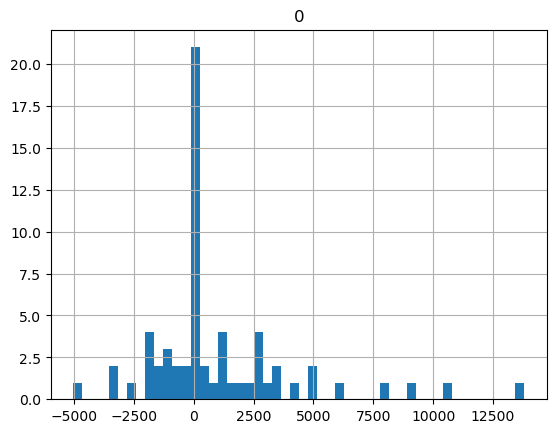

In [16]:
ridge_coef.hist(bins=50)

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
enet = ElasticNetCV()
enet.fit(X_train,y_train)

ElasticNetCV()

In [67]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

scores = []    
for r in np.linspace(0.9,1,20):
    enet = ElasticNet(alpha = 0.99,l1_ratio=r)
    model = 'enet'
    enet.fit(X_train,y_train)
    train = enet.score(X_train,y_train)
    y_pred = enet.predict(X_val)
    test = enet.score(X_val,y_val)
    mse = mean_squared_error(y_val,y_pred,squared=False)
    scores.append([model,train,test,mse])

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.772e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.617e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.449e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

In [68]:
scores

[['enet', 0.8463066455604862, 0.8769670723926009, 27484.999875422665],
 ['enet', 0.8465386441569566, 0.8769823705078295, 27483.291057407096],
 ['enet', 0.8467724165712545, 0.8769906021320808, 27482.37153103202],
 ['enet', 0.847008057349341, 0.8769910451992967, 27482.322036647776],
 ['enet', 0.8472456721964169, 0.8769828548030856, 27483.236959304908],
 ['enet', 0.8474853809309619, 0.876965032559098, 27485.227719270166],
 ['enet', 0.8477273217342489, 0.876936385387342, 27488.42733084548],
 ['enet', 0.8479716573997618, 0.8768954687640067, 27492.996675559607],
 ['enet', 0.8482185847389054, 0.8768405064321008, 27499.133373244145],
 ['enet', 0.8484683490985607, 0.8767692730695228, 27507.08473988695],
 ['enet', 0.8487212674185427, 0.876678916066421, 27517.16746180325],
 ['enet', 0.8489777661070566, 0.8765656719275687, 27529.798890185142],
 ['enet', 0.8492384458656004, 0.8764243888238029, 27545.5497074416],
 ['enet', 0.8495041985027036, 0.8762476652540546, 27565.23890289761],
 ['enet', 0.84977

In [102]:
enet_coef = pd.DataFrame(data = enet.coef_, index = X_train.columns)

In [134]:
columns = ridge_coef.sort_values(by=[0], key = abs, ascending = False).head(35)

In [129]:
enet_coef.sort_values(by=[0], key = abs, ascending = False).head(50)

,0
pool_qc,-32144.660261
exter_qual,17805.387094
yr_sold,-14326.431893
kitchen_abvgr,-14247.295310
street,13871.719750
overall_qual,13108.889651
bsmt_cond,-10388.566159
kitchen_qual,10192.449048
fireplaces,10135.269195
land_contour,9935.545566


<AxesSubplot:>

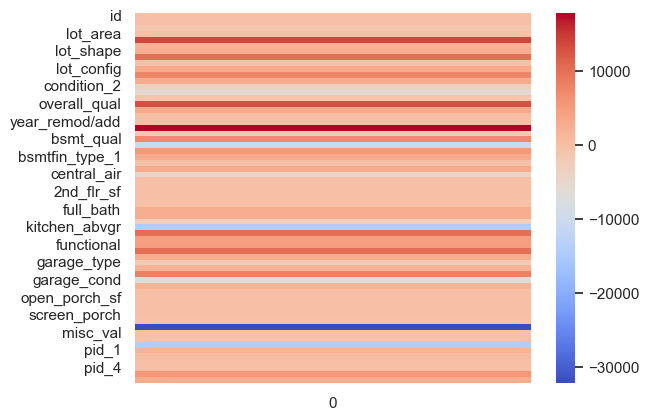

In [121]:
sns.set()
figsize = (10,40)
sns.heatmap(enet_coef, cmap = 'coolwarm')

In [137]:
columns.index

Index(['overall_qual', 'exter_qual', 'kitchen_qual', 'land_contour',
       'fireplaces', 'bsmt_cond', 'bsmt_exposure', 'bsmt_qual', 'functional',
       'totrms_abvgrd', 'bsmtfin_type_1', 'bedroom_abvgr', 'kitchen_abvgr',
       'heating_qc', 'overall_cond', 'land_slope', 'condition_1', 'lot_config',
       'bldg_type', 'garage_finish', 'garage_qual', 'pid_1', 'condition_2',
       'yr_sold', 'garage_type', 'lot_shape', 'garage_cond', 'fireplace_qu',
       'pool_qc', 'bsmtfin_type_2', 'central_air', 'fence_prv', 'fence_wood',
       'paved_drive', 'house_style'],
      dtype='object')

In [140]:
X = pd.DataFrame(data = df_train, columns = columns.index)

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   overall_qual    2051 non-null   int64
 1   exter_qual      2051 non-null   int64
 2   kitchen_qual    2051 non-null   int64
 3   land_contour    2051 non-null   int64
 4   fireplaces      2051 non-null   int64
 5   bsmt_cond       2051 non-null   int64
 6   bsmt_exposure   2051 non-null   int64
 7   bsmt_qual       2051 non-null   int64
 8   functional      2051 non-null   int64
 9   totrms_abvgrd   2051 non-null   int64
 10  bsmtfin_type_1  2051 non-null   int64
 11  bedroom_abvgr   2051 non-null   int64
 12  kitchen_abvgr   2051 non-null   int64
 13  heating_qc      2051 non-null   int64
 14  overall_cond    2051 non-null   int64
 15  land_slope      2051 non-null   int64
 16  condition_1     2051 non-null   int64
 17  lot_config      2051 non-null   int64
 18  bldg_type       2051 non-nul

<BarContainer object of 63 artists>

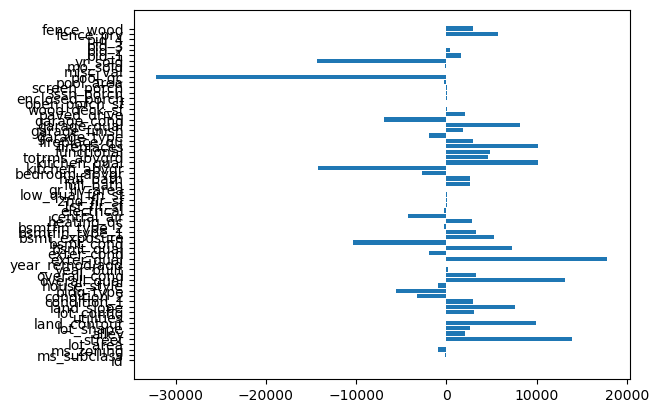

In [114]:
figsize = (20,20)
plt.barh(y = X_train.columns,width=enet.coef_)

In [97]:
enet.coef_.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [101]:
sns.barplot(enet_coef.index,enet_coef.values)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Data must be 1-dimensional

In [80]:
enet_coef.columns

array([0], dtype=int64)

In [85]:
sns.barplot(enet_coef)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [12]:
def ridge_coefs(X_train, y_train, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    rg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        rg.set_params(alpha = a)
        
        # fit or refit the model on the provided X, Y
        rg.fit(X_train, y_train)
        
        # Get out the coefficient list
        coefs.append(rg.coef_)
        
    return coefs

In [13]:
# strengths of penalties
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train, y_train, r_alphas)

interactive(children=(FloatSlider(value=0.0, description='log_of_alpha', max=5.0, step=0.05), Output()), _dom_…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

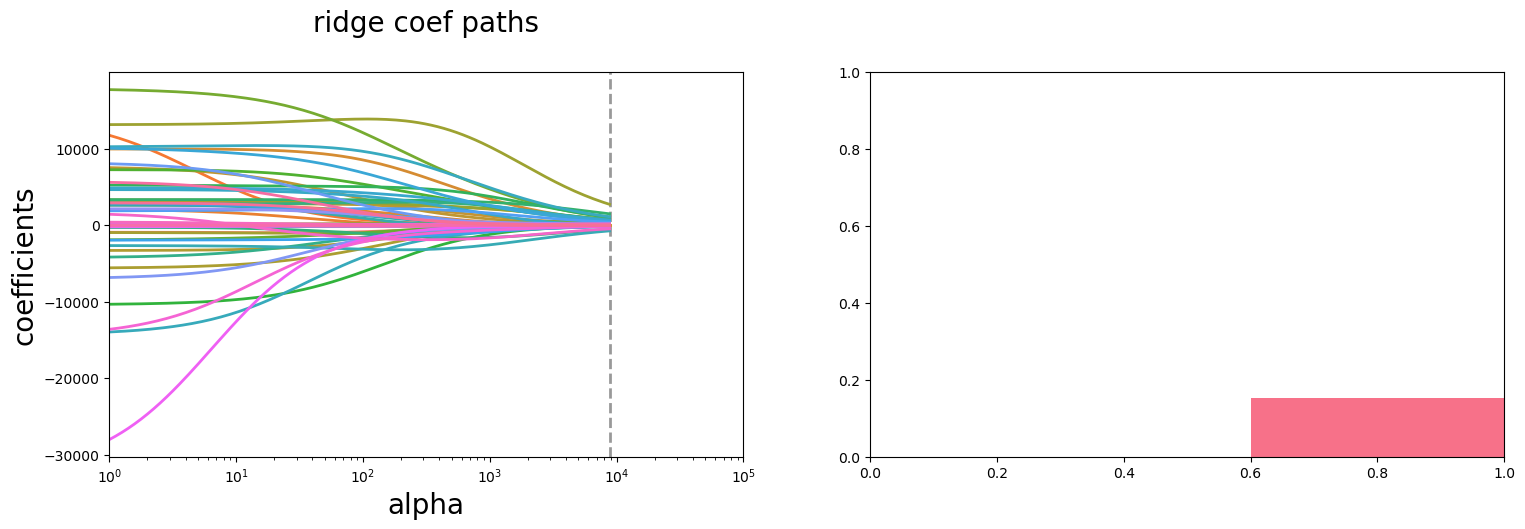

In [14]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X_train.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

In [15]:
def lasso_coefs(X_train, y_train, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X_train, y_train)
        coefs.append(lasso_reg.coef_)
        
    return coefs

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    l_alphas = np.arange(0, 0.5, 0.0025)
    l_coefs = lasso_coefs(X_train, y_train, l_alphas)
    
def lasso_plot_runner(alpha=0):
    coef_plotter(l_alphas, l_coefs, X_train.columns, alpha, regtype='lasso')

interact(lasso_plot_runner, alpha=(0.001,0.5,0.0025))

interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.5, min=0.001, step=0.0025), Output()…

<function __main__.lasso_plot_runner(alpha=0)>

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

def elasticnet_coefs(X_train, y_train, alphas):
    coefs = []
    enet_reg = ElasticNet()
    for a in alphas:
        enet_reg.set_params(alpha=a, l1_ratio=0.05)
        enet_reg.fit(X_train, y_train)
        coefs.append(enet_reg.coef_)
        
    return coefs

enet_alphas = np.arange(0.01, 1, 0.005)
enet_coefs = elasticnet_coefs(X_train, y_train, enet_alphas)



def enet_plot_runner(alpha=0.01):
    coef_plotter(enet_alphas, enet_coefs, X_train.columns, alpha, regtype='elastic net')

interact(enet_plot_runner, alpha=(0.01,1.01,0.005))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.362e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.450e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.185e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.207e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.229e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.692e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.708e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.723e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.077e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.089e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.102e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.388e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.399e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.409e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.640e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.648e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.657e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.863e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.871e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.878e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+12, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+12, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+12, tolerance: 9.727e+08
  model = cd_fast.enet_coo

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.01, min=0.01, step=0.005), Output()),…

<function __main__.enet_plot_runner(alpha=0.01)>

In [6]:
x = [(X_train.columns[col], variance_inflation_factor(X_train,col)) for col in range(len(X_train.columns))]

KeyboardInterrupt: 

# 34 Columns!!!

In [ ]:
pool_qc	-32144.660261
exter_qual	17805.387094
yr_sold	-14326.431893
kitchen_abvgr	-14247.295310
street	13871.719750
overall_qual	13108.889651
bsmt_cond	-10388.566159
kitchen_qual	10192.449048
fireplaces	10135.269195

land_contour	9935.545566
garage_qual	8163.489748
land_slope	7620.538432
bsmt_qual	7234.446707
garage_cond	-6962.227740
fence_prv	5687.330386
bldg_type	-5611.005120
bsmt_exposure	5244.378560
functional	4846.814909
totrms_abvgrd	4635.900030
central_air	-4230.452669
bsmtfin_type_1	3319.025862
overall_cond	3314.386448
condition_2	-3304.915222
lot_config	3058.376147
fireplace_qu	2943.533350
condition_1	2897.525672
fence_wood	2887.431014
heating_qc	2790.948052
bedroom_abvgr	-2658.067300
lot_shape	2612.994392
full_bath	2609.539510
half_bath	2602.049483
paved_drive	2109.401447
alley	2071.866767
garage_type	-1966.867895
exter_cond	-1932.770460
garage_finish	1846.529181
pid_1	1621.40246

In [290]:
df_train = pd.read_csv('./datasets/df_train.csv')

In [291]:
X = df_train.drop(columns = 'saleprice')
y = df_train['saleprice']

In [292]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [295]:
num_train = X_train.select_dtypes('number')
num_val = X_val.select_dtypes('number')
cat_train = X_train.select_dtypes('object')
cat_val = X_val.select_dtypes('object')

In [298]:
ohe = OneHotEncoder(
        drop='first',
        sparse=False,
        handle_unknown='ignore')

poly = PolynomialFeatures(
    degree = 2,
    include_bias=False)

ss = StandardScaler()

In [302]:
pd

,x0_1.0,x1_1.0,x2_1.0,x3_1.0,x4_1.0,x5_1.0,x6_1.0,x7_1.0,x8_1.0,x9_1.0,...,x81_1.0,x82_1.0,x83_1.0,x84_1.0,x85_1.0,x86_1.0,x87_1.0,x88_1.0,x89_1.0,x90_1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [286]:
ctx = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(
        drop='first',
        sparse=False,
        handle_unknown='ignore'),
     ['neighborhood','roof_style','roof_matl','exterior_1st','exterior_2nd',
      'heating','foundation','sale_type'])
],remainder='passthrough')

In [287]:
X_train = ctx.fit_transform(X_train)
X_val = ctx.transform(X_val)

In [288]:
X_train = pd.DataFrame(data = X_train,columns = ctx.get_feature_names_out())
X_val = pd.DataFrame(data = X_val,columns = ctx.get_feature_names_out())


In [289]:
X_train.columns

Index(['ohe__neighborhood_Blueste', 'ohe__neighborhood_BrDale',
       'ohe__neighborhood_BrkSide', 'ohe__neighborhood_ClearCr',
       'ohe__neighborhood_CollgCr', 'ohe__neighborhood_Crawfor',
       'ohe__neighborhood_Edwards', 'ohe__neighborhood_Gilbert',
       'ohe__neighborhood_Greens', 'ohe__neighborhood_GrnHill',
       ...
       'remainder__misc_feature', 'remainder__misc_val', 'remainder__mo_sold',
       'remainder__yr_sold', 'remainder__pid_1', 'remainder__pid_2',
       'remainder__pid_3', 'remainder__pid_4', 'remainder__fence_prv',
       'remainder__fence_wood'],
      dtype='object', length=158)

(513, 0)

In [262]:
poly = PolynomialFeatures(
    degree = 2,
    include_bias=False)

In [263]:
pipe = Pipeline(
    steps = [
    ('ss',StandardScaler()),
    ('poly',poly),
    ('ctx',ctx)
])

In [264]:
pipe.fit(X_train,y_train)

ValueError: could not convert string to float: 'NAmes'

In [223]:
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)

In [224]:
lr = LinearRegression()
model = 'lr'
lr.fit(X_train,y_train)
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['lr', 1.0, -96.1352907422108, 772277.8563076346]

In [225]:
ridge = RidgeCV()
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.991509444495813, 0.6399327326507322, 47019.37819771734]

In [248]:
lasso = Lasso(alpha = 1100)
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['lasso', 0.9366049862773005, 0.9140405447853496, 22973.749820654168]

In [238]:
enet = ElasticNet(
alpha = 10,
l1_ratio=0.91)

model = 'enet'
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['enet', 0.9475674197881954, 0.7940942744335877, 35556.52186435542]